# 2.1.1, 2.1.2

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.input_area pre {font-family: Consolas; font-size: 12pt; line-height: 140%;}</style>"))
display(HTML("<style>.output_area pre {font-family: Consolas; font-size: 12pt; line-height: 140%;}</style>"))

# 데이터 구성

- Pregnancies : 임신 횟수
- Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
- BloodPressure : 이완기 혈압 (mm Hg)
- SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
- Insulin : 2시간 혈청 인슐린 (mu U / ml)
- BMI : 체질량 지수 (체중kg / 키(m)^2)
- DiabetesPedigreeFunction : 당뇨병 혈통 기능
- Age : 나이
- Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv("diabetes.csv")
df.shape

(768, 9)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# info로 데이터타입, 결측치, 메모리 사용량 등의 정보 확인 non-null - 결측치 없음, 모두 숫자로 이루어진 데이터
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# 결측치 개수 확인
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# descirbe를 사용해 수치 데이터 통계 확인
# object type가 있다면, include="object" 옵션을 사용 - object type 포함하여 출력합니다.
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# 1사분위는 25%, 2사분위는 50%, 3사분위수는 75%입니다.

# 평균값이 중위값보다 높다는 것은 max 값이 꽤 높다는 뜻입니다.

# min을 보면 최소값이 모두 0인데 글루코스, 혈압, skinthickness(피부주름두께), BMI은 0일 수 없으므로 결측치일 가능성이 높습니다.
# 요약값을 통해서는 데이터를 정확히 알 수 없기 떄문에 시각화를 해볼 수 있습니다.

In [9]:
# 가장 마지막에 있는 Outcome은 label 값이기 때문에 제외하고 
# 학습과 예측에 사용할 컬럼을 만들어준다.
# feature_columns 라는 변수에 담아준다.

feature_columns = df.columns[0:-1].tolist()
feature_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

# 결측치 시각화
- 값을 요약해 보면 최솟값이 0으로 나오는 값들이 있다.
- 0이 나올 수 있는 값도 있지만, 인슐린이나 혈압 등의 값은 0값이 결측치라고 볼 수 있다.
- 따라서 0인 값을 결측치로 처리하고 시각화해보자.

In [10]:
#결측치가 Clucose컬럼부터 존재하므로 Clucose 컬럼부터 가져온다.
cols = feature_columns[1:]
cols

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [11]:
# 결측치 여부를 나타내는 데이터프레임을 만든다.
# 0값을 결측치라 가정하고 정답(label, target)값을 제외한 컬럼에 대해
# 결측치 여부를 구해서 df_null이라는 데이터프레임에 저장한다.
# 결측치 개수 확인
df_null = df[cols].replace(0, np.nan)
df_null = df_null.isnull()
df_null.sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [12]:
df_null.mean() * 100 #결측치의 비율

Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64

<AxesSubplot:>

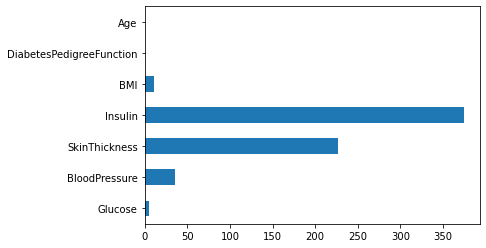

In [13]:
#결측치의 개수를 구해 막대 그래프로 시각화
#brah는 막대를 세로로 출력
df_null.sum().plot.barh()

<AxesSubplot:>

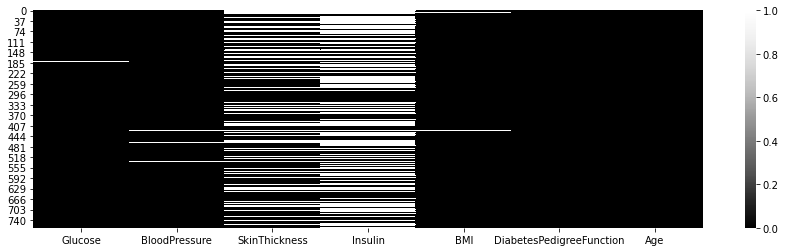

In [14]:
#결측치를 heatmap으로 시각화 
#plt.figure으로 시각화 그래프의 사이즈를 조절
plt.figure(figsize=(15, 4))
sns.heatmap(df_null, cmap="Greys_r")
# 결측치만 흰색으로 설정

# 2.1.3

In [15]:
# 정답값 (target, label)
# 정답값인 outcome의 개수 확인
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [16]:
#정답값 outcome의 비율확인
df["Outcome"].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [17]:
#발병 안하는게 65%, 발병하는게 35%

In [18]:
#임신횟수와 정답값 비교
#pregnancies를 groupby로 그룹화하여 Outcome에 대한 비율을 구한다.
#결과를 df_po라는 변수에 저장
df.groupby(['Pregnancies'])['Outcome'].mean()
#임신 횟수가 늘어날수록 발병횟수가 늘어난다. 14번 이상이면 100퍼로 증가

Pregnancies
0     0.342342
1     0.214815
2     0.184466
3     0.360000
4     0.338235
5     0.368421
6     0.320000
7     0.555556
8     0.578947
9     0.642857
10    0.416667
11    0.636364
12    0.444444
13    0.500000
14    1.000000
15    1.000000
17    1.000000
Name: Outcome, dtype: float64

In [19]:
#빈도수와 같이 보자. aggregation
df.groupby(['Pregnancies'])['Outcome'].agg(['mean','count'])

,mean,count
Pregnancies,,
0,0.342342,111
1,0.214815,135
2,0.184466,103
3,0.360000,75
4,0.338235,68
5,0.368421,57
6,0.320000,50
7,0.555556,45
8,0.578947,38


In [20]:
df_po = df.groupby(['Pregnancies'])['Outcome'].agg(['mean','count']).reset_index()
df_po

,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


<AxesSubplot:>

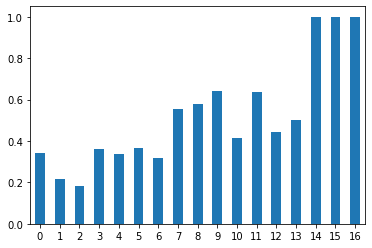

In [21]:
#임신횟수에 따른 당뇨병 발병 비율
df_po['mean'].plot.bar(rot=0)
#rot=0이면 글자를 세워서볼 수 있다.

<AxesSubplot:xlabel='Outcome', ylabel='count'>

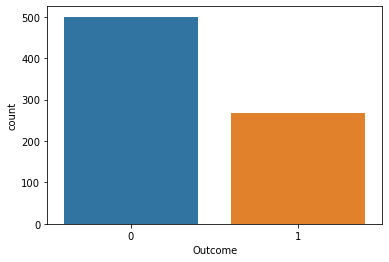

In [22]:
#위에서 구했던 당뇨병 발병 비율을 구해보자
#당뇨병 발병 빈도수를 비교

sns.countplot(data=df, x='Outcome')

#발병하는 비율이 높다

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

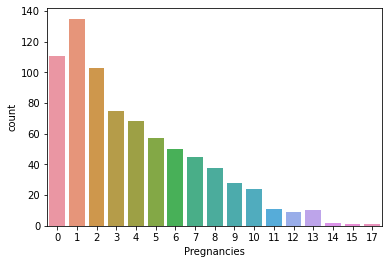

In [23]:
#임신횟수에 따른 당뇨병 발병 빈도수
sns.countplot(data=df, x='Pregnancies')

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

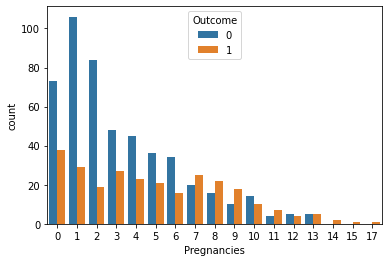

In [24]:
sns.countplot(data=df, x='Pregnancies', hue = 'Outcome')
#hue 포토샵에 있는 hue어쩌구와 같음
#Outcome값에 따라 다르게 표현
#6번까지는 발병하지 않을 비율이 높지만 7번 이상은 발병할 비율이 더 높다.

In [25]:
# Decision Tree 사용하여 예측할 때 조건에 따라 가지를 치게되는데 조건의 수가 많아지면 
#오버피팅 현상이 발생할 수 있음 (케이스가 적은 것에 대해)

In [26]:
#임신횟수의 많고 적음에 따라 Pregnancies_high 변수를 만든다. 
df['Pregnancies_high' ]= df['Pregnancies'] > 6
df[['Pregnancies','Pregnancies_high']].head() #6번 초과만 True로 뜨는 것 확인

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


<AxesSubplot:xlabel='Pregnancies_high', ylabel='count'>

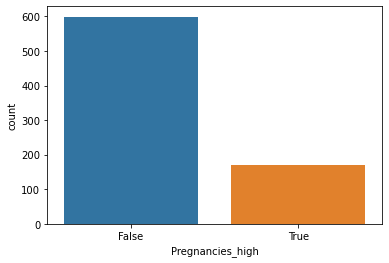

In [27]:
#Pregnancies_high 변수의 빈도수를 countplot으로 그리고
#Outcome 값에 따라 다른 색상으로 표현
sns.countplot(data=df, x='Pregnancies_high')
#6번 이하가 더 많다.

<AxesSubplot:xlabel='Pregnancies_high', ylabel='count'>

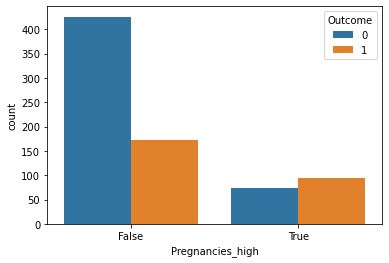

In [28]:
sns.countplot(data=df, x='Pregnancies_high', hue = 'Outcome')
#임신횟수가 적은 그룹에서는 발병하지 않는 수가 더 많다.

# 2.1.4

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

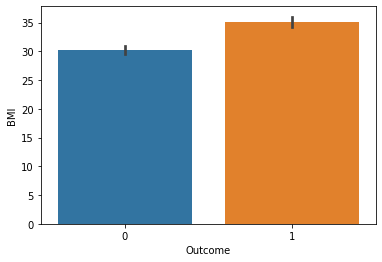

In [29]:
# 당뇨병 발병에 따른 BMI 수치 비교
sns.barplot(data=df, x='Outcome', y='BMI')
#당뇨병 발병에 따른 BMI 수치를 비교합니다. 수치에 조금 차이가 있습니다.

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

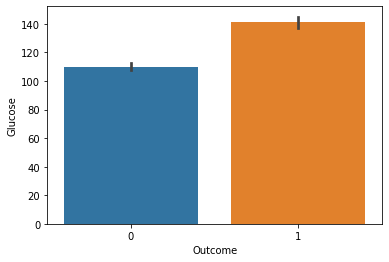

In [30]:
#당뇨병 발병에 따른 포도당(Glucose)수치를 비교
sns.barplot(data=df, x="Outcome", y="Glucose")
#글루코스와도 수치 차이가 난다는 것을 알 수 있습니다.

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

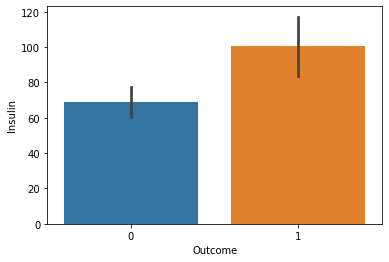

In [31]:
#Insulin 수치가 0 이상인 관측치에 대해서 당뇨병 발병 비교
sns.barplot(data=df, x="Outcome", y="Insulin")
# y축은 평균값을 표시하고 있습니다.
# 그래프 위에 세로로 그려진 까만 선은 데이터 일부를 샘플링하여 95%의 신뢰구간을 나타내는데
# 신뢰구간의 차이가 크다고 볼 수 있습니다.

<AxesSubplot:xlabel='Pregnancies', ylabel='Outcome'>

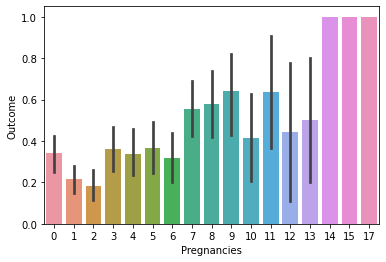

In [32]:
#임신횟수에 대해서 당뇨병 발병 비율 비교
sns.barplot(data=df, x="Pregnancies", y="Outcome")
# 평균값을 출력합니다. Outcome 비율을 그려볼 수 있습니다.

<AxesSubplot:xlabel='Pregnancies', ylabel='Glucose'>

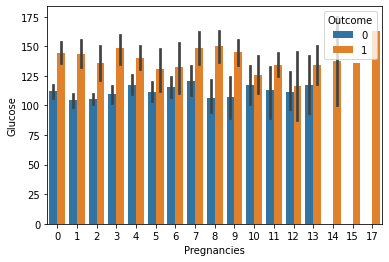

In [33]:
#임신횟수에 따른 포도당 수치를 당뇨병 발병여부(Outcome)에 따라 시각화
sns.barplot(data=df, x="Pregnancies", y="Glucose", hue="Outcome")
# 당뇨병 발병여부에 따라 글루코스 수치 차이가 있음을 알 수 있습니다.

<AxesSubplot:xlabel='Pregnancies', ylabel='BMI'>

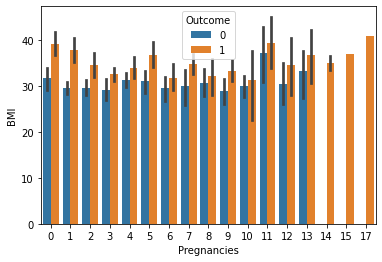

In [34]:
#임신횟수에 따른 체질량지수(BMI)를 당뇨병 발병여부(Outcome)에 따라 시각화
sns.barplot(data=df, x="Pregnancies", y="BMI", hue="Outcome")
# 당뇨병 발병한 사람들이 BMI 수치가 더 높습니다.

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

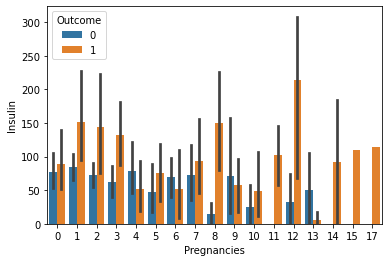

In [35]:
#임신횟수에 따른 인슐린 수치를 당뇨병 발병여부(Outcome)에 따라 시각화
#인슐린 수치에는 결측치가 많기 때문에 0보다 큰 값에 대해서만 그린다.
sns.barplot(data=df, x="Pregnancies", y="Insulin", hue="Outcome")
# 당뇨병 발병한 사람들이 인슐린 수치가 더 높습니다.
# 평균값이 y축으로 나타나고, 신뢰구간의 차이가 꽤 나는 것을 확인할 수 있습니다.

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

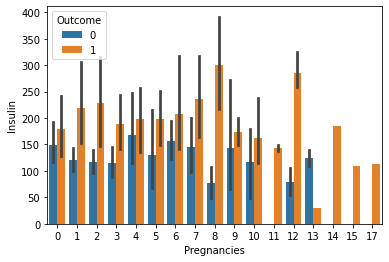

In [36]:
sns.barplot(data=df[df["Insulin"] > 0], x="Pregnancies", y="Insulin", hue="Outcome")
# 신뢰구간의 크기가 줄어들었습니다.
# 발병하는 사람들의 인슐린 신뢰구간의 차이가 많이 난다는 것을 알 수 있고,
# 발병하지 않는 경우는 인슐린 수치가 낮음을 알 수 있습니다.

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

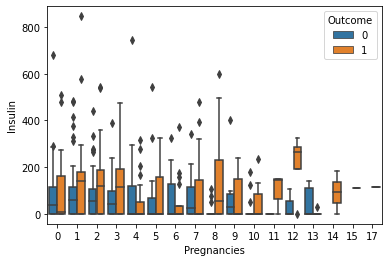

In [37]:
#임신횟수에 따른 인슐린 수치를 당뇨병 발병여부에 따라 시각화
sns.boxplot(data=df, x="Pregnancies", y="Insulin", hue="Outcome")
# 1사분위수와 3사분위 수의 차이가 크고, 최대값과 최소값의 차이도 큽니다.
# Insulin 값으로 0이 많으므로 boxplot이 주저앉았습니다.

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

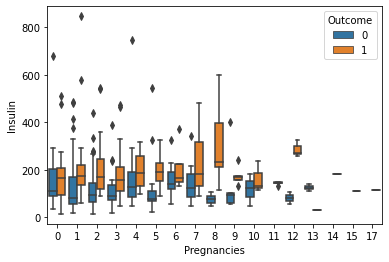

In [38]:
sns.boxplot(data=df[df["Insulin"] > 0], x="Pregnancies", y="Insulin", hue="Outcome")
# 임신횟수가 늘어갈수록 수치가 늘어납니다.

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

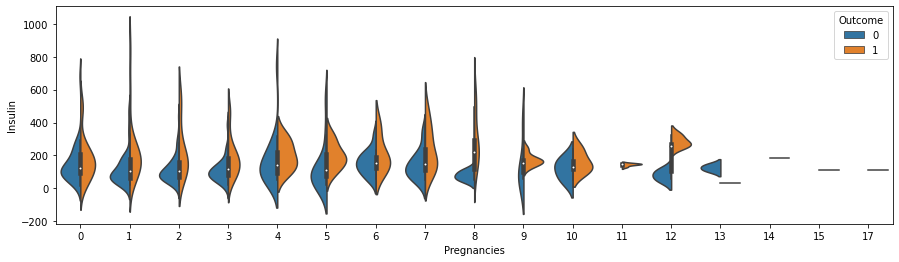

In [39]:
plt.figure(figsize=(15, 4))
sns.violinplot(data=df[df["Insulin"] > 0], x="Pregnancies", y="Insulin", hue="Outcome", split=True)
# 바이올린이 얇아서 굵게 그리고, 두 파트로 좌우로 데이터를 나눠보기 위해 split 옵션을 지정합니다.
# boxplot의 단정믈 보완할 수 있습니다.

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

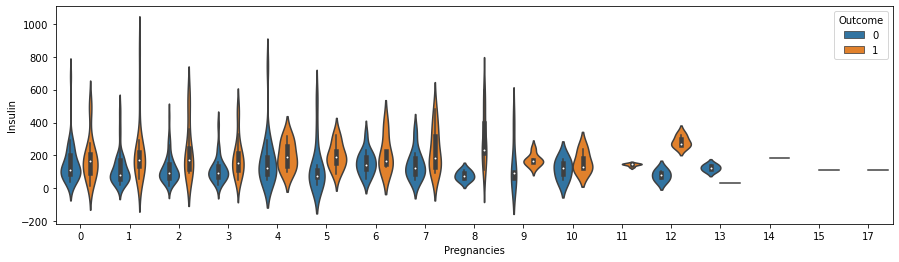

In [40]:
plt.figure(figsize=(15, 4))
sns.violinplot(data=df[df["Insulin"] > 0], x="Pregnancies", y="Insulin", hue="Outcome")

In [41]:
# swarmplot은 산포도를 그리는 데 적합합니다. split은 violinplot에서만 사용 가능하여 split을 지워줍니다.
# 주황색이 발병하는 케이스입니다. viloinplot과 swarmplot을 찍으면 데이터 수를 확인할 수 있습니다.
# 임신횟수는 당뇨병 발병률과 관련이 있는 것으로 보입니다.

# 2.1.5

<AxesSubplot:xlabel='Pregnancies'>

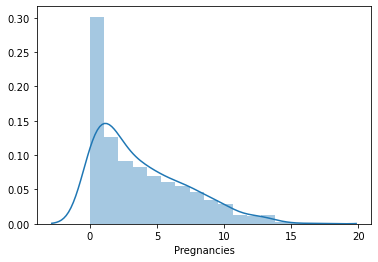

In [42]:
sns.distplot(df["Pregnancies"])
#곡선은 밀도추정곡선

In [43]:
df_0 = df[df["Outcome"] == 0]
df_1 = df[df["Outcome"] == 1]
df_0.shape, df_1.shape

((500, 10), (268, 10))

<AxesSubplot:xlabel='Pregnancies'>

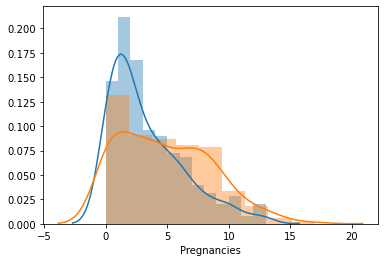

In [44]:
sns.distplot(df_0["Pregnancies"])
sns.distplot(df_1["Pregnancies"])

<AxesSubplot:xlabel='Age'>

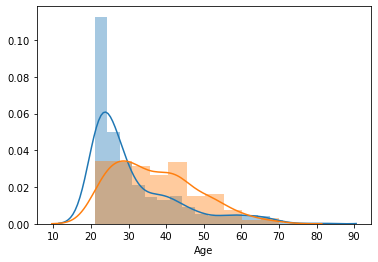

In [45]:
sns.distplot(df_0["Age"])
sns.distplot(df_1["Age"])

<AxesSubplot:xlabel='Age'>

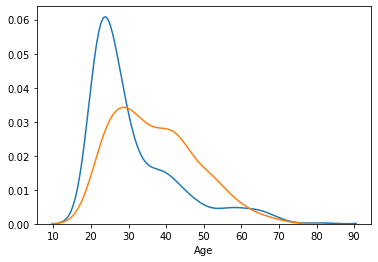

In [46]:
sns.distplot(df_0["Age"], hist=False)
sns.distplot(df_1["Age"], hist=False)

<AxesSubplot:xlabel='Age'>

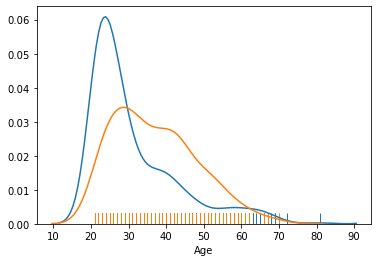

In [47]:
sns.distplot(df_0["Age"], hist=False, rug=True)
sns.distplot(df_1["Age"], hist=False, rug=True)

<AxesSubplot:xlabel='Age'>

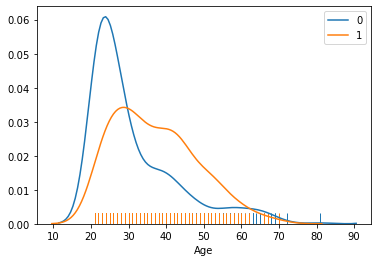

In [48]:
sns.distplot(df_0["Age"], hist=False, rug=True, label=0)
sns.distplot(df_1["Age"], hist=False, rug=True, label=1)

C:\Users\USER\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\USER\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\USER\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\USER\Anaconda3\lib\site-packages\pandas\plotting\_matplotli

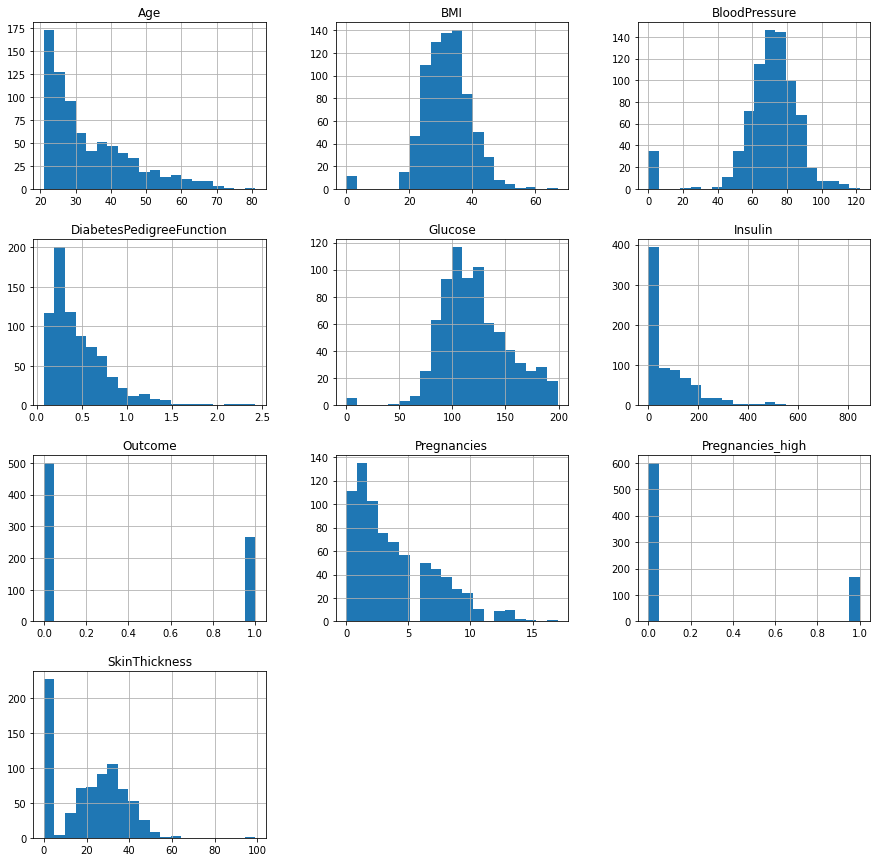

In [49]:
df["Pregnancies_high"] = df["Pregnancies_high"].astype(int)
h = df.hist(figsize=(15, 15), bins=20)

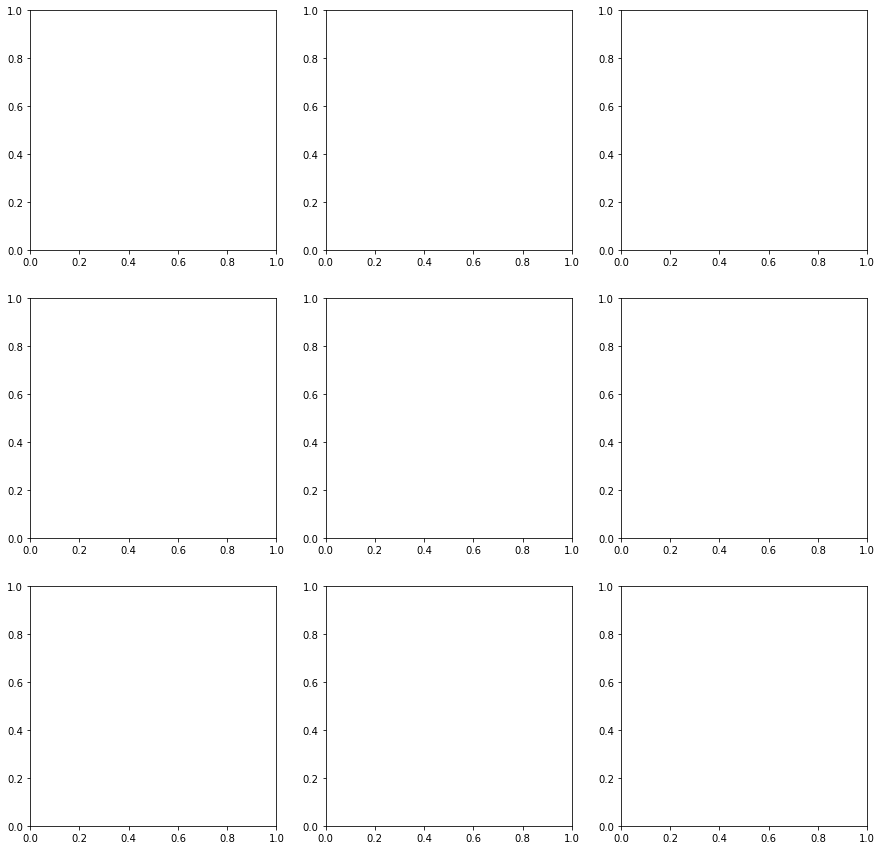

In [50]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

<AxesSubplot:xlabel='Outcome'>

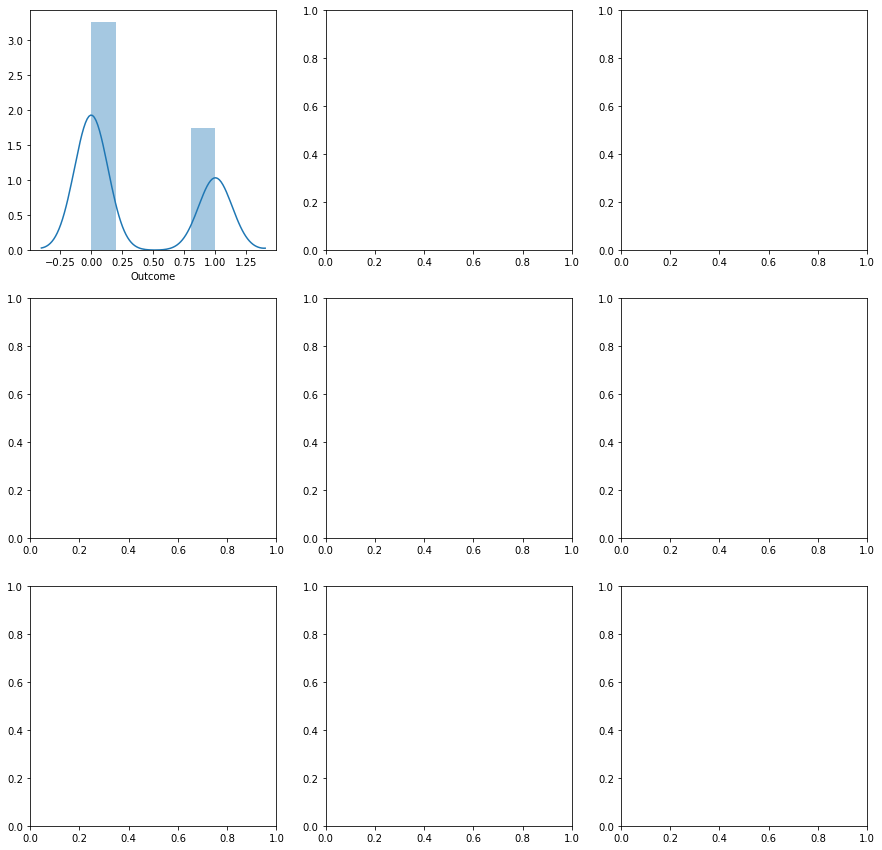

In [51]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

sns.distplot(df["Outcome"], ax=axes[0][0])

In [52]:
cols = df.columns[:-1].tolist()
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [53]:
cols = df.columns[:-1].tolist()


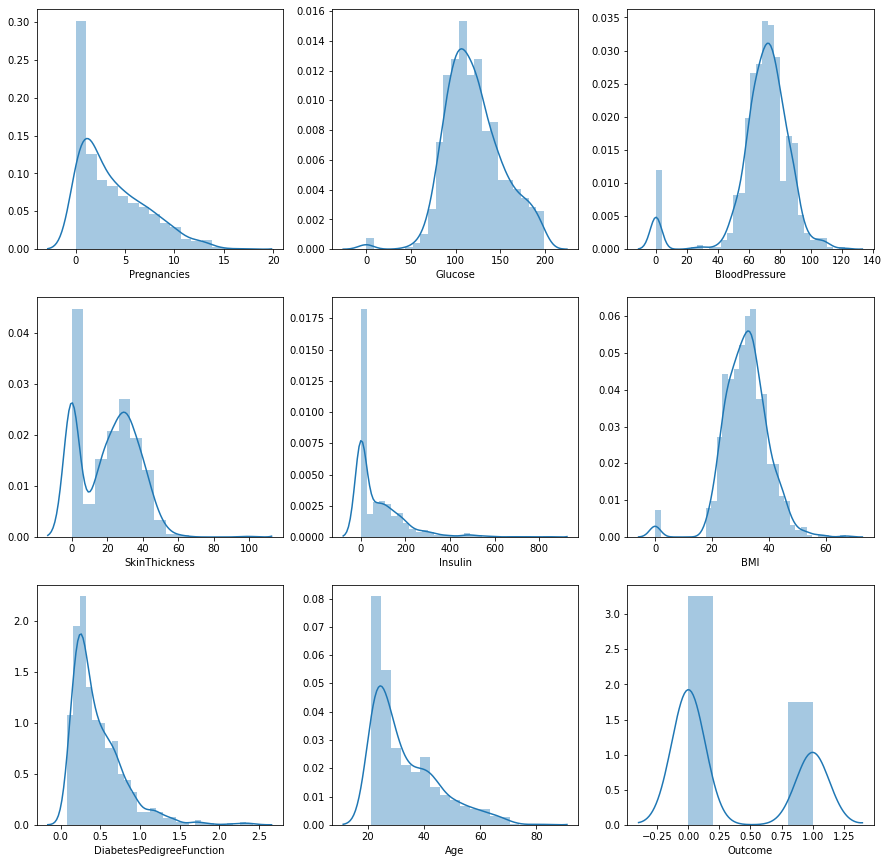

In [54]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for i, col_name in enumerate(cols):
    row = i // 3
    col = i % 3

    sns.distplot(df[col_name], ax=axes[row][col])

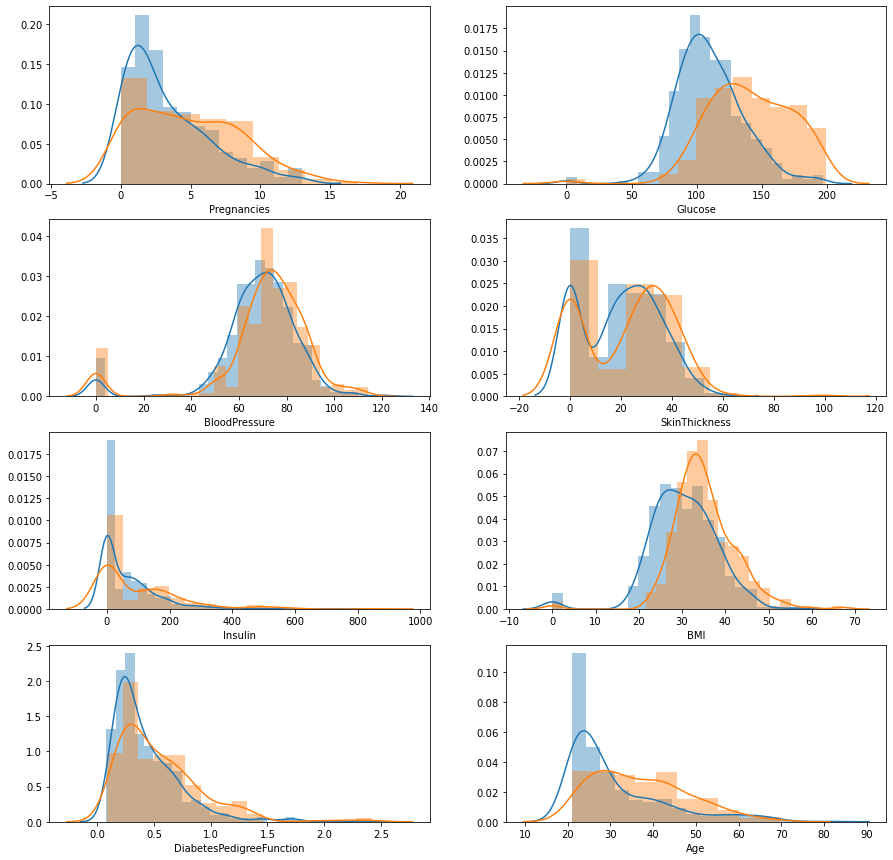

In [55]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

for i, col_name in enumerate(cols[:-1]):
    row = i // 2
    col = i % 2
    sns.distplot(df_0[col_name], ax=axes[row][col])
    sns.distplot(df_1[col_name], ax=axes[row][col])

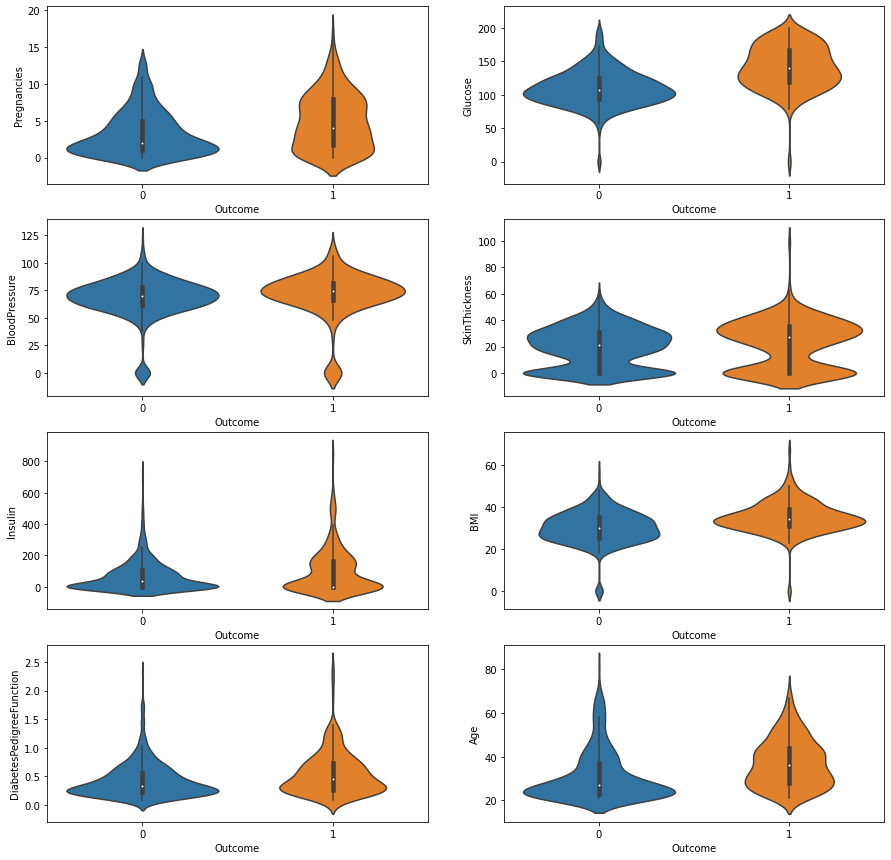

In [56]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

for i, col_name in enumerate(cols[:-1]):
    row = i // 2
    col = i % 2
    sns.violinplot(data=df, x="Outcome", y=col_name, ax=axes[row][col])

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

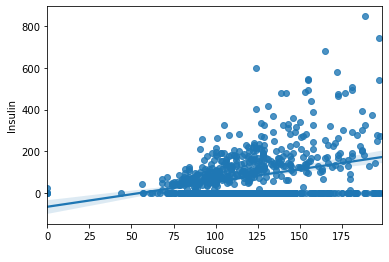

In [57]:
sns.regplot(data=df, x="Glucose", y="Insulin")


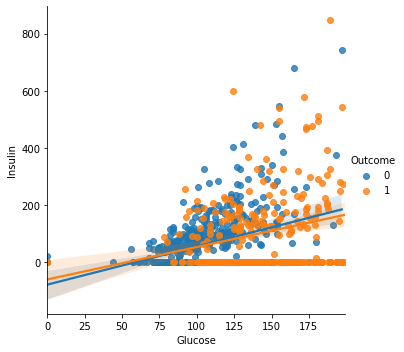

In [58]:
sns.lmplot(data=df, x="Glucose", y="Insulin", hue="Outcome")


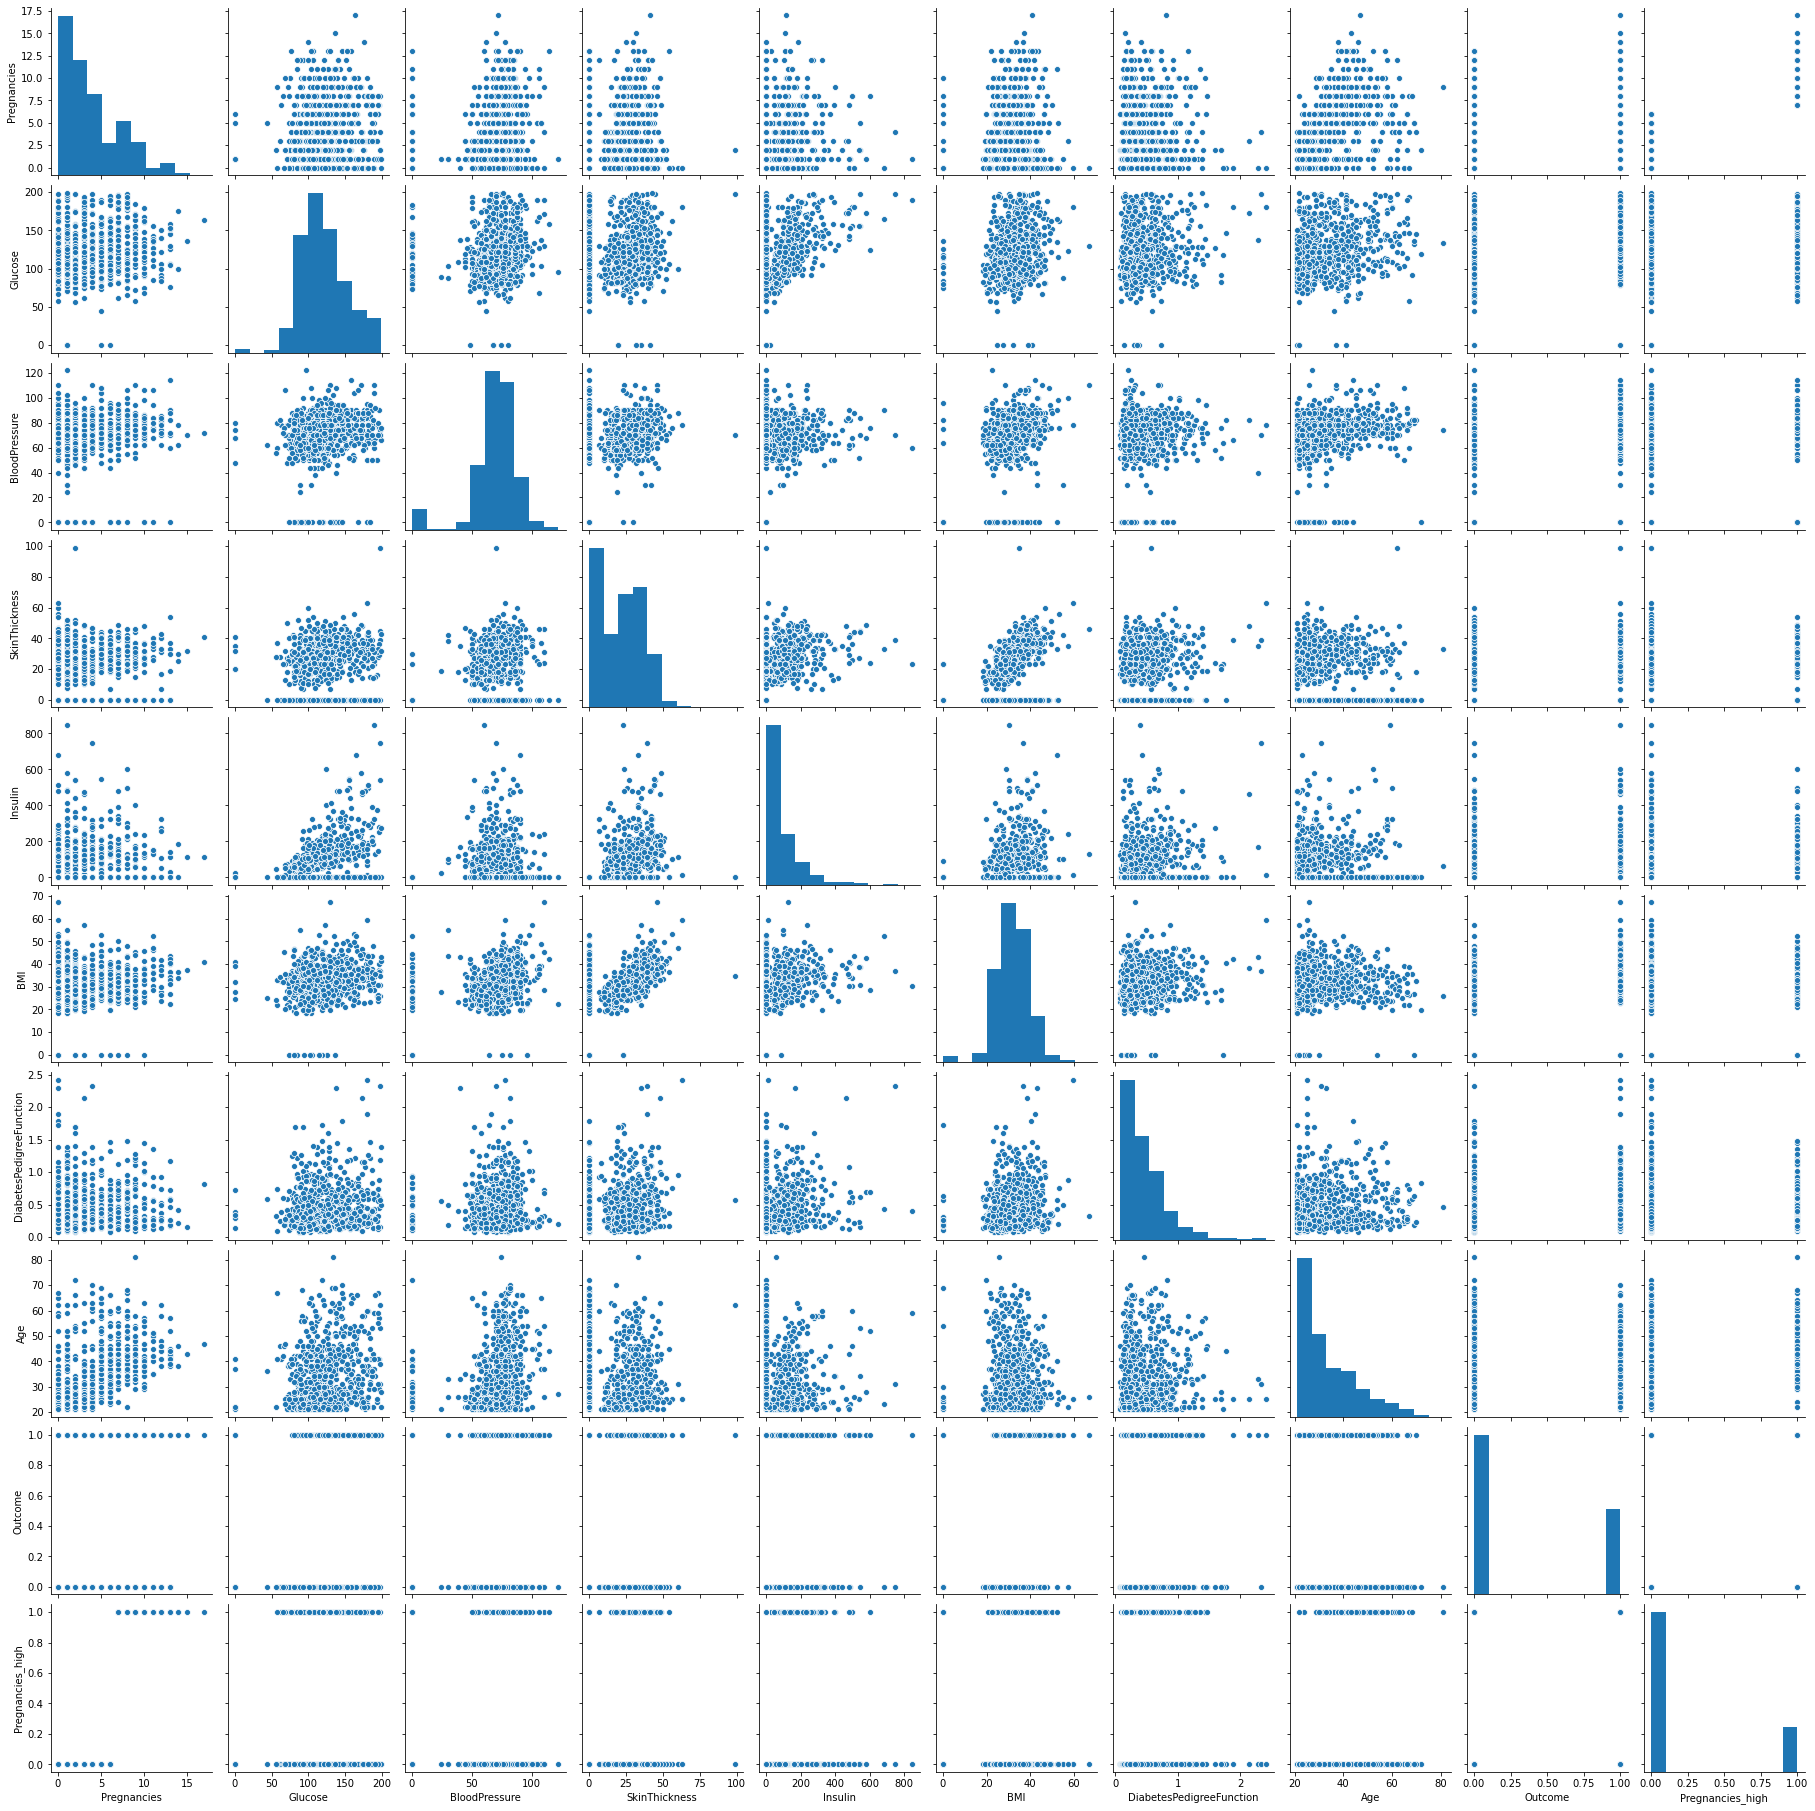

In [59]:
sns.pairplot(df)

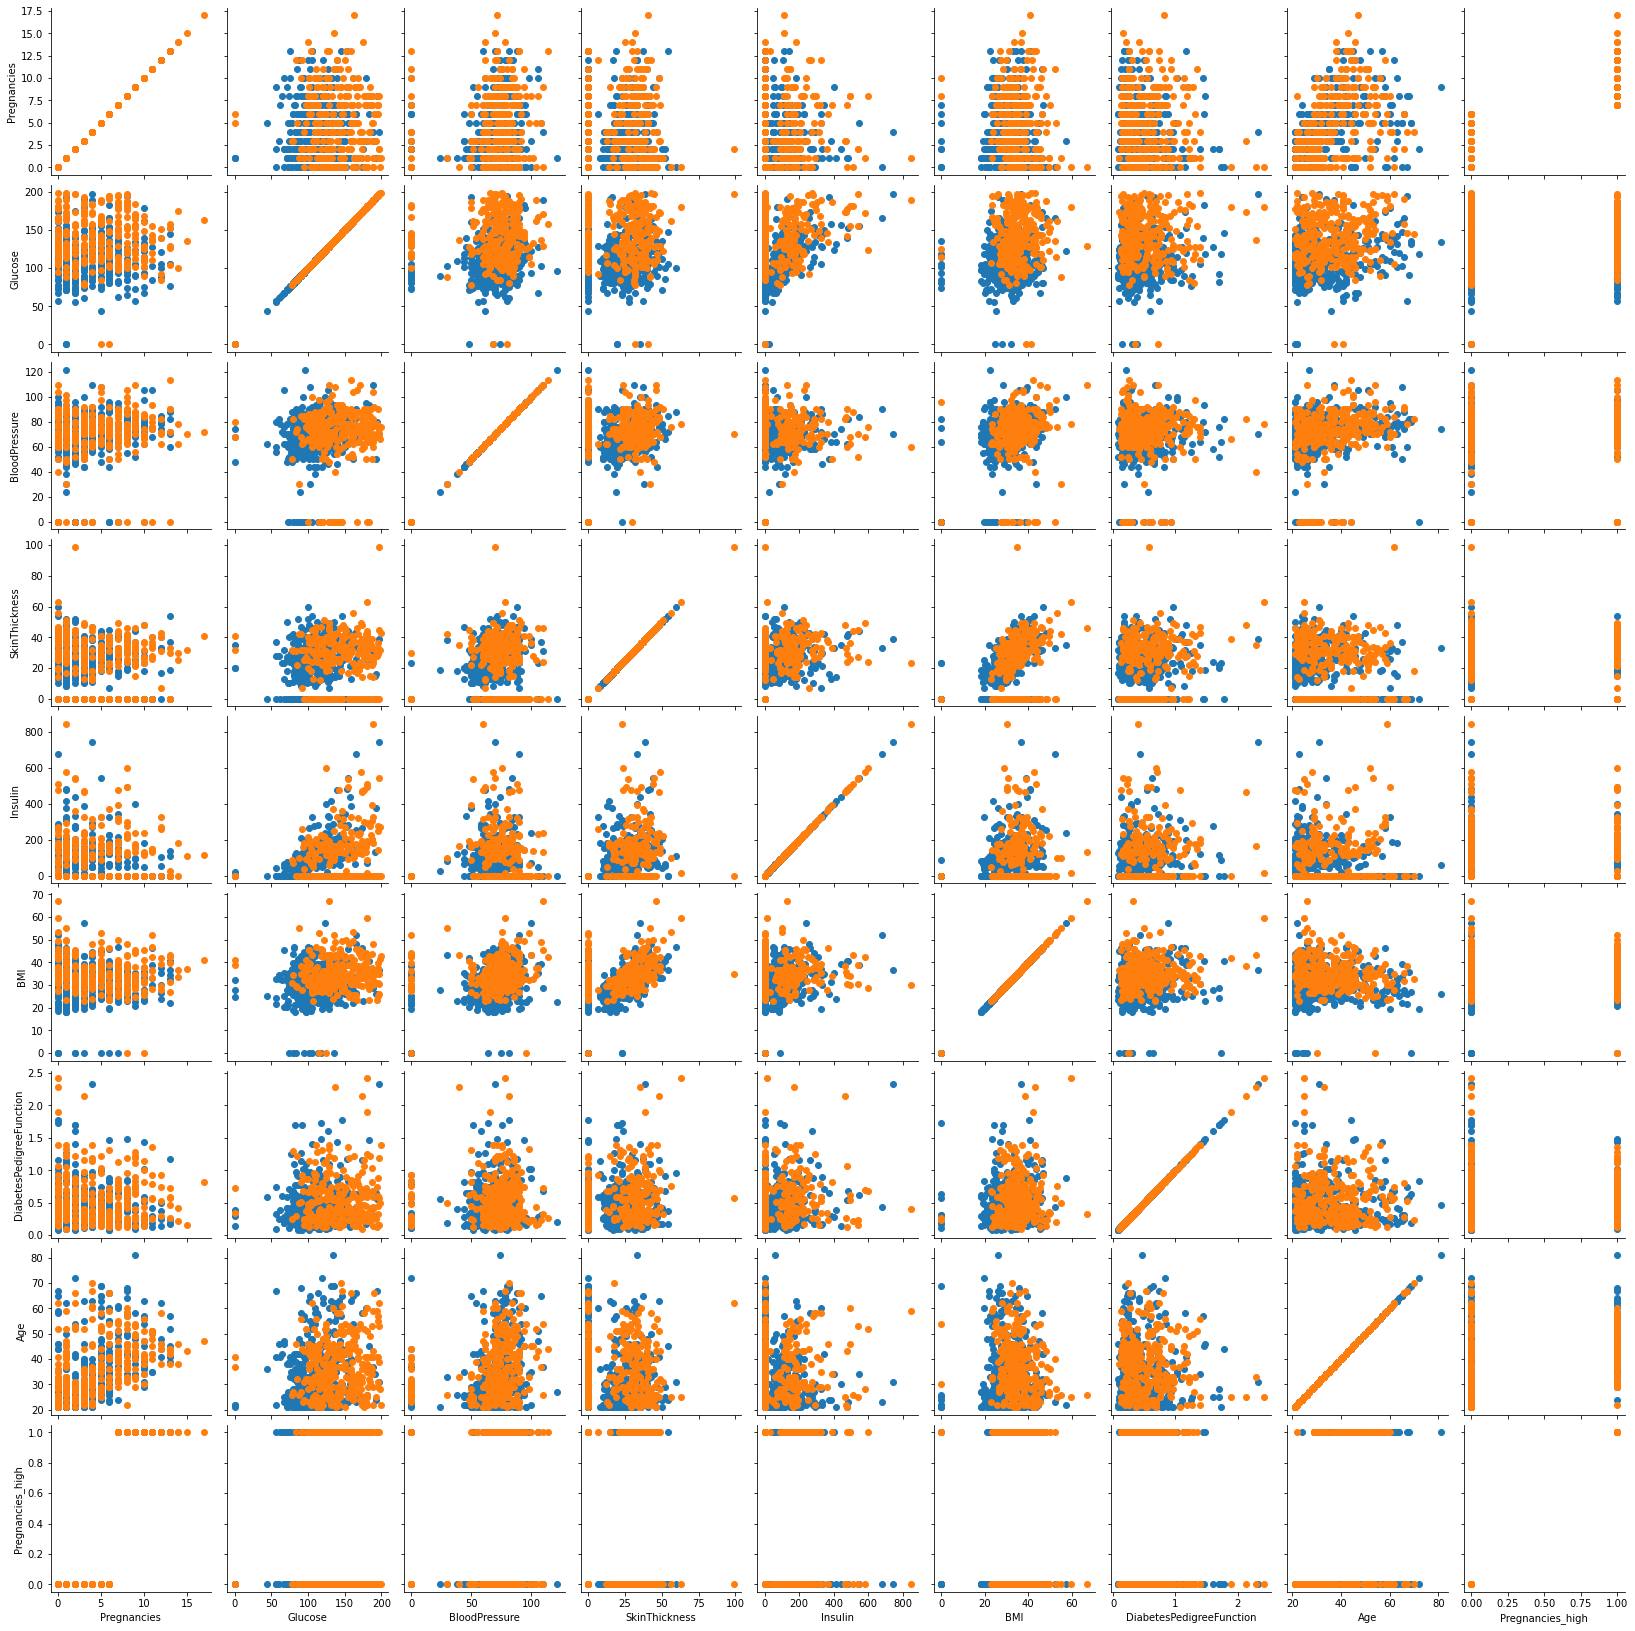

In [60]:
g = sns.PairGrid(df, hue="Outcome")
g.map(plt.scatter)

# 2.1.8

In [61]:
df_corr = df.corr()
df_corr.style.backbround_gradient()

AttributeError: 'Styler' object has no attribute 'backbround_gradient'

In [ ]:
sns.heatmap(df_corr)

In [ ]:
sns.heatmap(df_corr, vmax=1, vmin=-1)

In [ ]:
figure(figsize=(15, 8))
sns.heatmap(df_corr, annot=True, vmax=1, vmin=-1, cmap="coolwarm")

In [ ]:
df.iloc[:, :-2].replace(0, np.nan)

In [ ]:
df_matrix = df.iloc[:, :-2].replace(0, np.nan)
df_matrix["Outcome"] = df["Outcome"]
df_matrix.head()

In [ ]:
df_matrix = df.iloc[:, :-2].replace(0, np.nan)
df_matrix["Outcome"] = df["Outcome"]
df_matrix.head()

In [ ]:
df_corr["Outcome"]

In [ ]:
sns.regplot(data=df_matrix, x="Insulin", y="Glucose")